In [1]:
import stac
import distributed
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
from dask.distributed import Client
from dask_jobqueue import HTCondorCluster

In [2]:
cluster = HTCondorCluster(cores=1, memory='1GB', disk='200MB')
cluster.scale(6)

In [3]:
client = Client(cluster)
client

Client Scheduler: tcp://192.168.15.10:20829 Dashboard: http://192.168.15.10:8787/status,Cluster Workers: 6 Cores: 6 Memory: 6.00 GB


In [4]:
s = stac.STAC('http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0')

In [5]:
s.catalog

['C4_64',
 'C4_64_16D_MED',
 'C4_64_16D_STK',
 'C4_64_1M_MED',
 'C4_64_1M_STK',
 'HLS.L30',
 'HLS.S30',
 'LC8_30',
 'LC8_30_1M_MED',
 'LC8_30_1M_STK',
 'LC8DN',
 'LC8SR',
 'MOD13Q1',
 'MYD13Q1',
 'S2_10',
 'S2_10_16D_MED',
 'S2_10_16D_STK',
 'S2_10_1M_MED',
 'S2_10_1M_STK',
 'S2SR_SEN28',
 'S2TOA']

In [6]:
collection = s.collection('S2_10')
collection_itens = collection.get_items()
selected_asset = collection_itens.features[5].assets

In [7]:
chunks={'band': 1, 'x': 2048, 'y': 2048}

In [8]:
red = xr.open_rasterio(selected_asset['red']['href'], chunks=chunks) / 10000
nir = xr.open_rasterio(selected_asset['nir']['href'], chunks=chunks) / 10000

In [9]:
ndvi = (nir - red) / (nir + red)

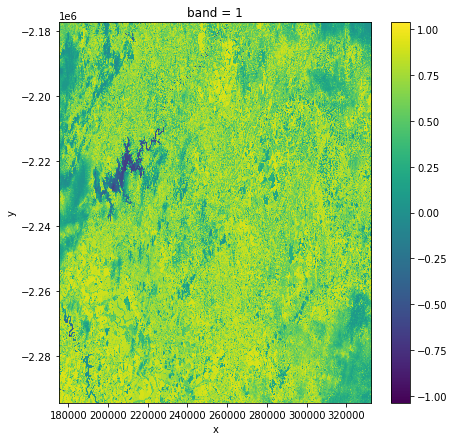

In [10]:
plt.figure(figsize=(7, 7))
ndvi.sel(band = 1).plot.imshow(cmap='viridis')